# 2.2 Intensity Transformation Functions
## 2.2.1 Functions `imadjust` and `stretchlim`

#### Function `imadjust` is the basic Image Processing Toolbox function for intensity transformations of gray-scale images. It has the general syntax

In [ ]:
g = imadjust(f, [low_in high_in], [low_out high_out], gamma)

#### This function maps the intensity values in image $f$ to new values in $g$, such that values between `low_in` and `high_in` map to value between `low_out` and `high_out`. Values below `low_in` and above `high_in` are clipped.

#### Parameter `gamma` specifies the shape of the curve that maps the intensity values in $f$ to create $g$. If `gamma` is less than 1, the mapping is weighted toward higher (brighter) output values. If `gamma` is greater than 1, the mapping is weighted toward lower (darker) output values.

### Example 2.1: Using function `imadjust`
#### Original image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



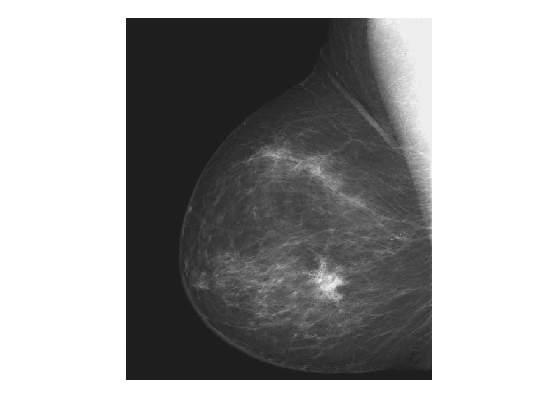

In [4]:
f = imread('Fig0203(a).tif');
imshow(f)

#### Negative image.
#### The negative of an image can be obtained also with toolbox function `imcomplement`

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



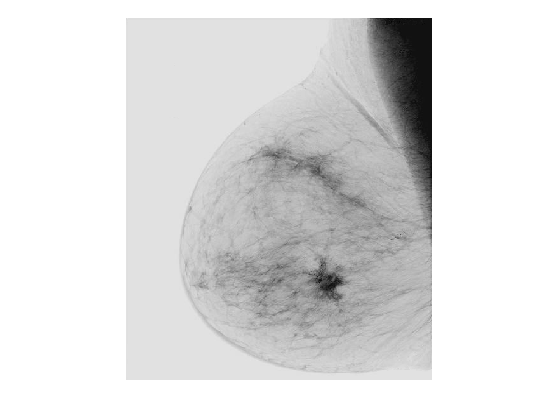

In [11]:
g1 = imadjust(f, [0 1], [1 0]);
g11 = imcomplement(f);

imshow(g1)

#### Expanding the intensities in the range [0.5, 0.75].
#### This type of processing is useful for highlighting an intensity band of interest.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



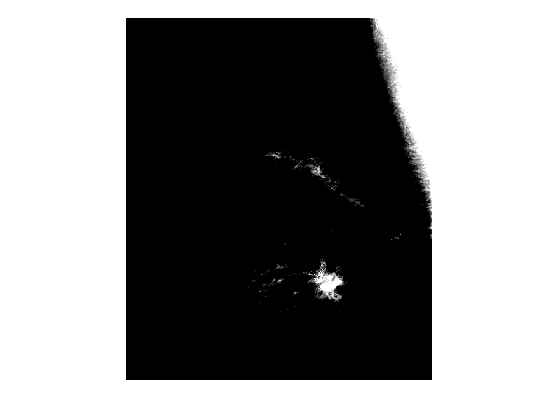

In [9]:
g2 = imadjust(f, [0.5 0.75], [0 1]);
imshow(g2)

#### Compress the low end and expand the high end of the gray scale to produce a result similar but with more gray tone image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



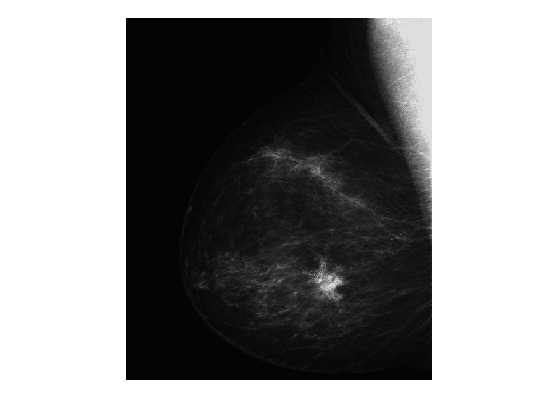

In [10]:
g3 = imadjust(f, [], [], 2);
imshow(g3)

#### Sometimes, it is of interest to be able to use function `imadjust` automatically, without have to be concerned about the low and high parameters discussed above. 

#### Function `stretchlim` is useful in that regard; its basic syntax is

In [ ]:
Low_High = stretchlim(f)

#### The result is used in vector `[low_in high_in]` in function `imadjust`, as follows:

In [ ]:
g = imadjust(f, stretchlim(f), []);

#### We can observe the increse in contrast.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



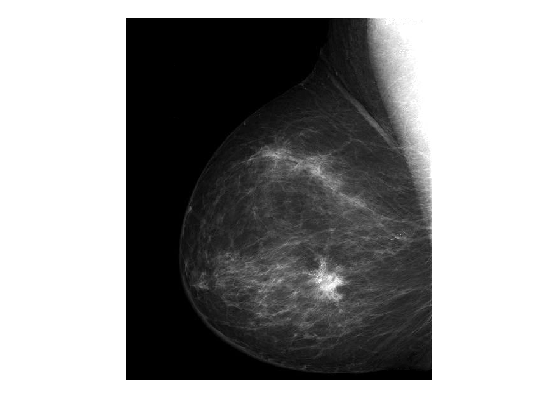

In [12]:
g4 = imadjust(f, stretchlim(f), []);
imshow(g4)

#### The following operation enhanced the contrast of the negative image.

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



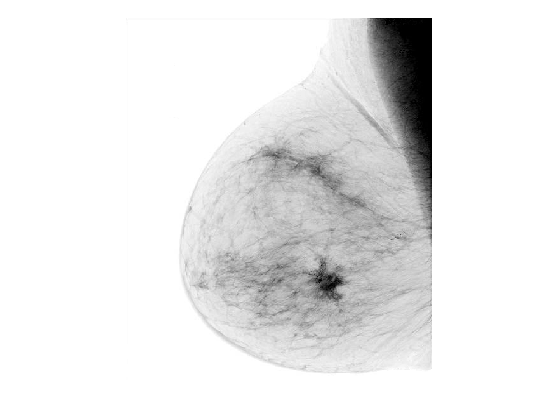

In [13]:
g5 = imadjust(f, stretchlim(f), [1 0]);
imshow(g5)

## 2.2.2 Logarithmic and Contrast-Stretching Transformations

#### One of the principal uses of the log transformation is to compress dynamic range.

#### When performing a logarithmic transformation, it is often desirable to bring the resulting compressed values back to the full range of display. For 8 bits, the easiest way to do this in MATLAB is with the statement

In [ ]:
gs = im2uint8(mat2gray(g))

#### Using `mat2gray` brings the values to the range $[0,1]$ and using `im2uint8` brings them to the range $[0,255]$, converting the image class to `uint8`

### Example 2.2 Using a log transformation to reduce dynamic range.

#### Figure 2.5(a) is a Fourier spectrum with values in the range 0 to $10^6$, displayed on a linearly scaled, 8-bit display system.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



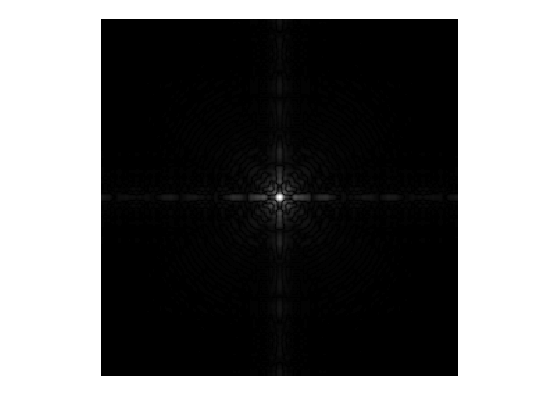

In [23]:
f = imread('Fig0205(a).tif');
imshow(f)

#### Figure 2.5(b) shows the result obtained using the commands

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



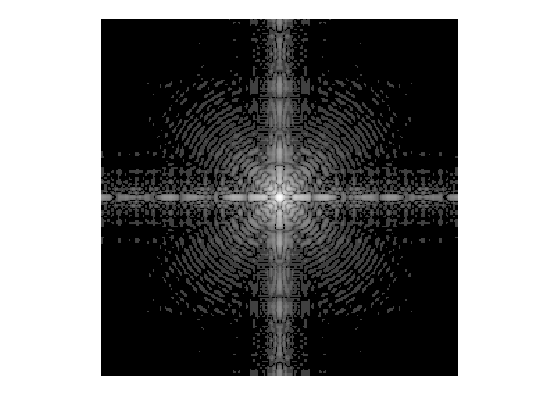

In [24]:
g = im2uint8(mat2gray(log(1 + double(f))));
imshow(g)

#### The visual improvement of $g$ over the original image is evident.

## 2.2.3 Specifying Arbitray Intensity Transformations

#### A simple way to implement intensity mappings is to use function `interp1` which, for this particular application, has the syntax

In [ ]:
g = interp1(z, T, f)

#### where $f$ is the input image, $g$ is the output image, $T$ is the column vector just explained, and $z$ is a column vector of the same length as $T$, formed as follows:

In [ ]:
z = linspace(0, 1, numel(T))';

## 2.2.4 Some Utility M-Functions for Intensity Transformations

### Another M-Function for Intensity Transformations

#### We will use function `tofloat` in this section, which syntax is

In [ ]:
[g, revertclass] = tofloat(f)

#### This function converts an image of class `logical`, `uint8`, `uint16`, or `int16` to class `single` applying the appropriate scale factor.

#### if $f$ is of class `double` or `single`, then $g=f$; also, recall that $revertclass$ is a function handle that can be used to convert the output pack to the same class as $f$.

### Example 2.3: Illustration of function `intrans`

#### As an illustration of function `intrans`, consider the image in Fig. 2.6(a), which is an ideal candidate for constrast stretching to enhance the skeletal structure. The result in Fig. 2.6(b) was obtained with the following call to `intrans`:

警告: 图像太大，无法在屏幕上显示；将以 33% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



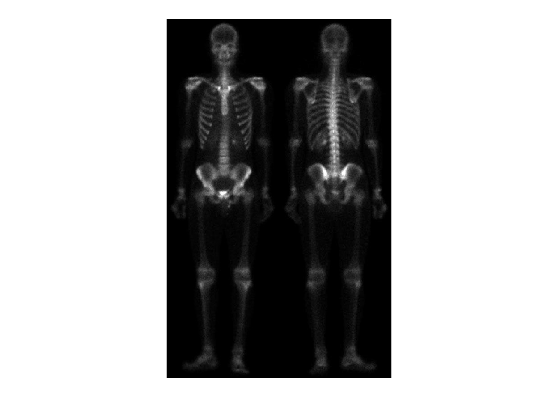

In [19]:
f = imread('Fig0206(a).tif');
imshow(f)

警告: 图像太大，无法在屏幕上显示；将以 33% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



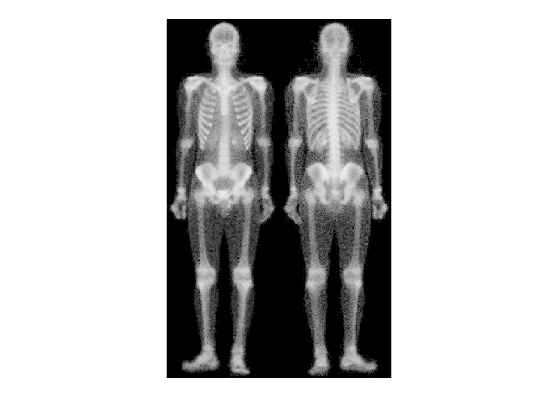

In [20]:
g = intrans(f, 'stretch', mean2(tofloat(f)), 0.9);
imshow(g)

### An M-Function for Intensity Scaling

#### If we want to scale the image to the full, maximum range, $[0,255]$ or $[0,65535]$, the following custom M-function, which we call `gscale`, accomplishes this. In addition, the function can map the output levels to a specified range. The syntax of function `gscale` is 

In [ ]:
g = gscale(f, method, low, high)

#### where $f$ is the image to be scaled.

#### Valid values for $method$ are `'full8'` (the default), which scales the output to the full range $[0,255]$, and `'full16'`, which scales the output to the full range $[0,65535]$. If included, parameters $low$ and $high$ are ignored in these two conversions.

#### A third valid value of $method$ is `'minmax'`, in which case parameters $low$ and $high$, both in the range $[0,1]$, must be provided. If `'minmax'` is selected, the levels are mapped to the range $[low,high]$. Although these values are specified in the range $[0,1]$, the program performs the proper scaling, depending on the class of the input, and then converts the output to the same class as the input.